In [10]:
# Importing the necessary library to handle XML files
import xml.etree.ElementTree as ET

# Load and parse the XML file
file_path = '../data/annotated/Dataset_CVAT/annotations.xml'
tree = ET.parse(file_path)
root = tree.getroot()

# Displaying the structure of the XML by showing the root and first few child tags and their attributes
xml_structure = {
    "root_tag": root.tag,
    "root_attributes": root.attrib,
    "children": [
        {"tag": child.tag, "attributes": child.attrib, "sample_text": child.text.strip() if child.text else None}
        for child in list(root)[:5]  # Show first 5 children
    ]
}

xml_structure

{'root_tag': 'annotations',
 'root_attributes': {},
 'children': [{'tag': 'version', 'attributes': {}, 'sample_text': '1.1'},
  {'tag': 'meta', 'attributes': {}, 'sample_text': ''},
  {'tag': 'image',
   'attributes': {'id': '0',
    'name': 'image1.png',
    'subset': 'default',
    'task_id': '60',
    'width': '1848',
    'height': '966'},
   'sample_text': ''},
  {'tag': 'image',
   'attributes': {'id': '1',
    'name': 'image2.png',
    'subset': 'default',
    'task_id': '60',
    'width': '1848',
    'height': '966'},
   'sample_text': ''},
  {'tag': 'image',
   'attributes': {'id': '2',
    'name': 'image3.png',
    'subset': 'default',
    'task_id': '60',
    'width': '1848',
    'height': '966'},
   'sample_text': ''}]}

In [11]:
import pandas as pd

# Extract data from each image tag into a list of dictionaries
image_data = [
    {
        "id": image.get("id"),
        "name": image.get("name"),
        "subset": image.get("subset"),
        "task_id": image.get("task_id"),
        "width": int(image.get("width")),
        "height": int(image.get("height"))
    }
    for image in root.findall('.//image')
]

# Create a DataFrame from the extracted data
image_df = pd.DataFrame(image_data)

# Preview the DataFrame to ensure correct data extraction
image_df.head(), image_df.describe()


(  id        name   subset task_id  width  height
 0  0  image1.png  default      60   1848     966
 1  1  image2.png  default      60   1848     966
 2  2  image3.png  default      60   1848     966
 3  3  image4.png  default      60   1848     966
 4  4  image5.png  default      60   1848     966,
              width       height
 count   290.000000   290.000000
 mean   1679.144828   919.527586
 std     417.048037   169.629071
 min     422.000000   316.000000
 25%    1848.000000   966.000000
 50%    1848.000000   966.000000
 75%    1848.000000   966.000000
 max    1848.000000  1280.000000)

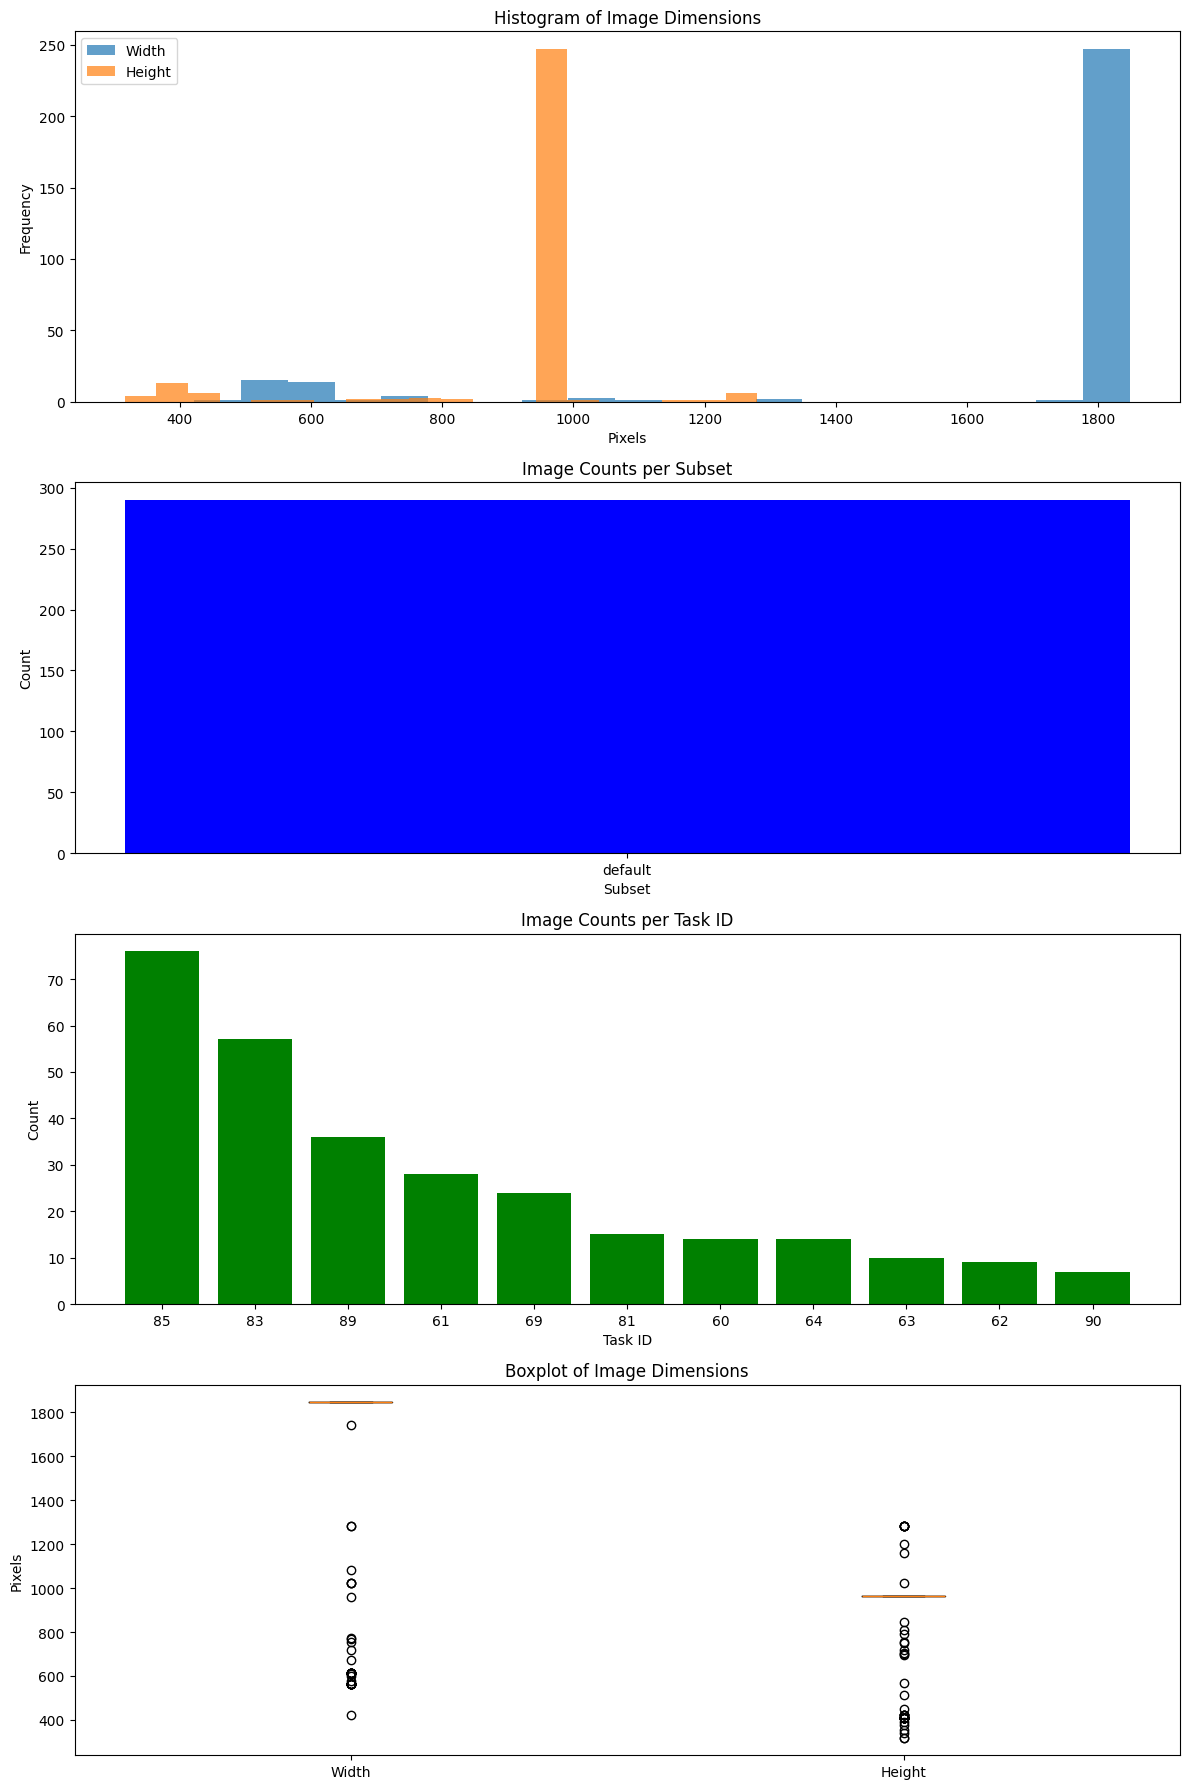

In [12]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 18))

# Histogram of image widths and heights
axs[0].hist(image_df['width'], bins=20, alpha=0.7, label='Width')
axs[0].hist(image_df['height'], bins=20, alpha=0.7, label='Height')
axs[0].set_title('Histogram of Image Dimensions')
axs[0].set_xlabel('Pixels')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Bar chart of image counts per subset
subset_counts = image_df['subset'].value_counts()
axs[1].bar(subset_counts.index, subset_counts.values, color='blue')
axs[1].set_title('Image Counts per Subset')
axs[1].set_xlabel('Subset')
axs[1].set_ylabel('Count')

# Bar chart of image counts per task ID
task_counts = image_df['task_id'].value_counts()
axs[2].bar(task_counts.index, task_counts.values, color='green')
axs[2].set_title('Image Counts per Task ID')
axs[2].set_xlabel('Task ID')
axs[2].set_ylabel('Count')
# Boxplot of image widths and heights
axs[3].boxplot([image_df['width'], image_df['height']], labels=['Width', 'Height'])
axs[3].set_title('Boxplot of Image Dimensions')
axs[3].set_ylabel('Pixels')

# Show the plots
plt.tight_layout()
plt.show()